### Import libraries

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import inspect
import pickle

### Density graphs

In [190]:
db_size = 10 ** 3
domain = 10 ** 7

output_dir = f'graphs/densities/size_{db_size}_domain_{domain}'
raw_df = pd.read_csv(f'{output_dir}/raw.csv')

with open(f'{output_dir}/metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

In [191]:
print(sum(metadata['number_of_nn_within_radius']) / len(metadata['number_of_nn_within_radius']))

28.624


In [192]:
raw_df = raw_df[raw_df['method'].isin(['DP-TT-CMP', 'LAPLACE', 'L-SRR'])]

In [201]:
with pd.option_context('display.max_rows', None):
    print(raw_df[raw_df['early_stopping_level'] == 1]['eps_cmp'].value_counts())

Series([], Name: count, dtype: int64)


In [194]:
frequent_values_index = raw_df['eps_cmp'].value_counts()[raw_df['eps_cmp'].value_counts() > 600].index
raw_df = raw_df[raw_df['eps_cmp'].isin(frequent_values_index)]

In [195]:
# change early_stopping_level to return_size
for early_stopping_level in [1, 3, 5, 9]:
    raw_df.loc[raw_df['early_stopping_level'] == early_stopping_level, 'return_size'] = round(raw_df[raw_df['early_stopping_level'] == early_stopping_level]['return_size'].mean(), 2)

In [196]:
raw_df['early_stopping_level'] -= 1

In [197]:
for early_stopping_level in ['all', 0, 2, 4, 8]:
    if early_stopping_level == 'all':
        tmp_df = raw_df
    else:
        tmp_df = raw_df[raw_df['early_stopping_level'] == early_stopping_level]

    for metric in ['raw_acc', 'top_5_acc', 'precision', 'recall']: # precision and recall considers top K values relevant

        # plot for both DP-TT and LDP
        plot = sns.lineplot(
            data=tmp_df, x='eps_cmp', y=f'{metric}', 
            hue='return_size', style='method', markers=True,
            palette='deep', alpha=0.75,
        )

        # graph params
        plot.set(
            ylim=(-0.1, 1.1),
    #         xlim=(0, 10),
            title=f'{metric} vs. total epsilon'
        )

        # move legend
        sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

        # save plot
        plot.get_figure().savefig(f'{output_dir}/{early_stopping_level}/{metric}.png', bbox_inches='tight', dpi=400)
        plt.close()
        plot.get_figure().clf()


### Precision-recall curves

In [202]:
raw_df

,Unnamed: 0,trial,early_stopping_level,scheduler_type,eps,geo_eps,method,return_size,raw_acc,top_5_acc,precision,recall
4,4,0,0,constant,0.600195,0.000725,DP-TT-CMP,1.0,False,False,0.000,0.0
5,5,0,0,constant,0.600195,NaN,L-SRR,1.0,False,False,0.000,0.0
6,6,0,0,constant,0.600195,0.000134,LAPLACE,1.0,False,False,0.000,0.0
12,12,0,0,constant,11.544233,0.051337,DP-TT-CMP,1.0,False,False,0.000,0.0
13,13,0,0,constant,11.544233,NaN,L-SRR,1.0,False,False,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95993,95993,499,8,constant,120.000000,NaN,L-SRR,250.0,True,True,0.108,1.0
95994,95994,499,8,constant,120.000000,0.026833,LAPLACE,250.0,True,True,0.108,1.0
95996,95996,499,8,constant,170.000000,0.181244,DP-TT-CMP,250.0,True,True,0.108,1.0
95997,95997,499,8,constant,170.000000,NaN,L-SRR,250.0,True,True,0.108,1.0


In [198]:
for eps in raw_df['eps_cmp'].unique():
    tmp_df = raw_df[raw_df['eps_cmp'] == eps].groupby(['method', 'early_stopping_level'])
    mean_df = tmp_df[['precision', 'recall']].mean()

    # plot for both DP-TT and LDP
    plot = sns.lineplot(
        data=mean_df, x='recall', y='precision', 
        style='method', markers=True,
        palette='deep', alpha=0.75,
    )

    # graph params
    plot.set(
        ylim=(-0.1, 1.1),
        xlim=(-0.1, 1.1),
        title=f'Precision vs. recall for epsilon = {round(eps, 2)}'
    )

    # move legend
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

    plot.get_figure().savefig(f'{output_dir}/precision_recall/{round(eps, 2)}.png', bbox_inches='tight', dpi=400)
    plt.close()
    plot.get_figure().clf()

/var/folders/jy/t_9q9phj4099q_jf2p2dxf9r0000gn/T/ipykernel_53164/3972287322.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(
/var/folders/jy/t_9q9phj4099q_jf2p2dxf9r0000gn/T/ipykernel_53164/3972287322.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(
/var/folders/jy/t_9q9phj4099q_jf2p2dxf9r0000gn/T/ipykernel_53164/3972287322.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(
/var/folders/jy/t_9q9phj4099q_jf2p2dxf9r0000gn/T/ipykernel_53164/3972287322.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(
/var/folders/jy/t_9q9phj4099q_jf2p2dxf9r0000gn/T/ipykernel_53164/3972287322.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.lineplot(
/var/folders/jy/t_9q9phj4099q_jf2p2dxf9r0000gn/T/ipykernel_53164/3972287322.py:6: UserWarn

### Gowalla

In [40]:
import pandas as pd

df = pd.read_csv('./data/loc-gowalla_totalCheckins.txt', sep='\t', header=None)
df.columns = ['userid','timestamp','latitude','longitude','spotid']
df = df[['longitude', 'latitude']]

In [41]:
lon_min, lon_max, lat_min, lat_max = -122.443021, -122.399762, 37.769949, 37.803729
df = df[(df['latitude'] > lat_min) & (df['latitude'] < lat_max) & (df['longitude'] > lon_min) & (df['longitude'] < lon_max)]

In [42]:
df.size

139604

In [50]:
db_size = 10 ** 5
domain = 10 ** 7

output_dir = f'graphs/gowalla/sf/'
raw_df = pd.read_csv(f'{output_dir}raw.csv')

with open(f'{output_dir}metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

In [51]:
print(sum(metadata['number_of_nn_within_radius']) / len(metadata['number_of_nn_within_radius']))

51.712


In [52]:
with pd.option_context('display.max_rows', None):
    print(raw_df[raw_df['early_stopping_level'] == 1]['eps_cmp'].value_counts())

eps
9.797024e-01    1413
1.876162e+01    1404
9.617052e-02    1395
1.156988e+01    1392
2.678570e+01    1380
8.000000e+01    1350
4.491125e+01    1341
6.400000e+01    1332
1.920000e+02    1308
2.720000e+02    1302
1.120000e+02    1287
1.600000e+02    1284
1.700000e+02     216
1.190000e+02     213
2.890000e+02     198
2.040000e+02     192
6.795710e+01     168
4.680484e+01     159
8.500000e+01     150
2.785090e+01     120
1.198854e+01     108
9.913665e-02     105
1.947754e+01      96
1.010489e+00      87
1.414873e+03       1
2.219902e+00       1
1.080967e+04       1
7.630356e+03       1
6.358630e+03       1
4.451041e+03       1
3.179315e+03       1
1.750409e+03       1
3.217504e+03       1
4.249065e+00       1
6.026015e+02       1
8.114974e+01       1
4.148932e+01       1
3.692165e+01       1
3.655552e-01       1
5.351180e+03       1
3.777303e+03       1
3.147753e+03       1
1.575942e+03       1
1.606485e+04       1
7.682555e+01       1
9.416550e+01       1
1.610062e+04       1
4.611636e

In [53]:
frequent_values_index = raw_df['eps_cmp'].value_counts()[raw_df['eps_cmp'].value_counts() > 750].index

In [54]:
raw_df = raw_df[raw_df['eps_cmp'].isin(frequent_values_index)]

In [55]:
raw_df = raw_df[raw_df['early_stopping_level'] == 5]

In [11]:
# change early_stopping_level to return_size
for early_stopping_level in [1, 3, 5, 9]:
    raw_df.loc[raw_df['early_stopping_level'] == early_stopping_level, 'return_size'] = round(raw_df[raw_df['early_stopping_level'] == early_stopping_level]['return_size'].mean(), 2)

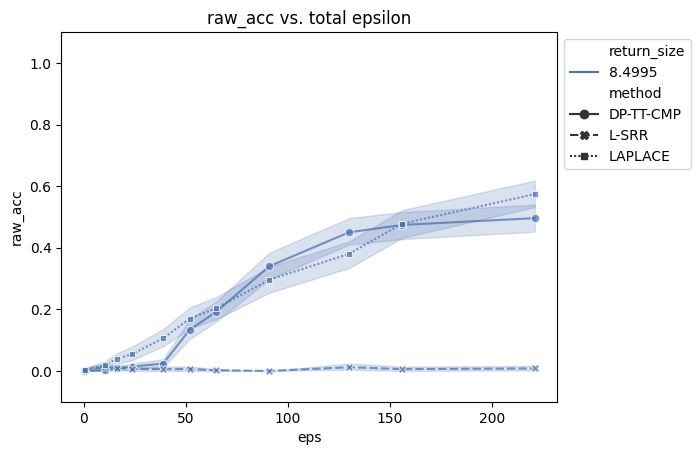

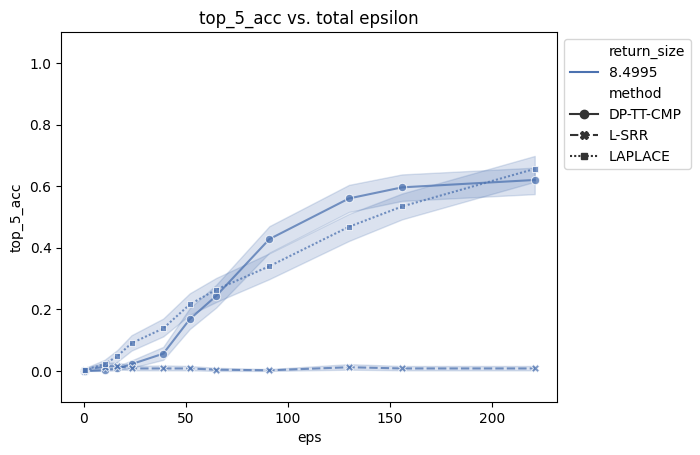

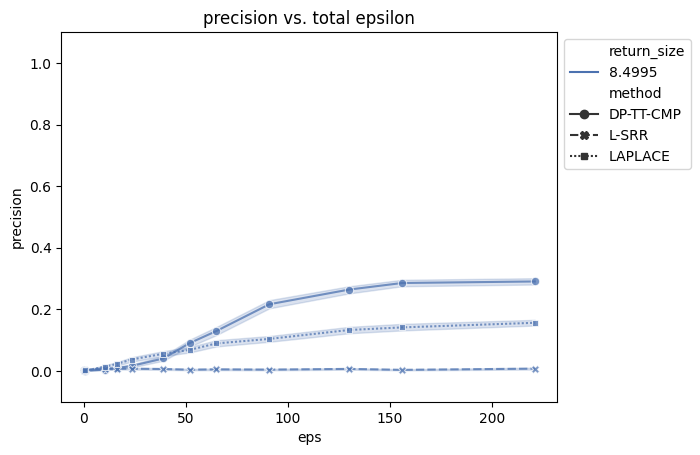

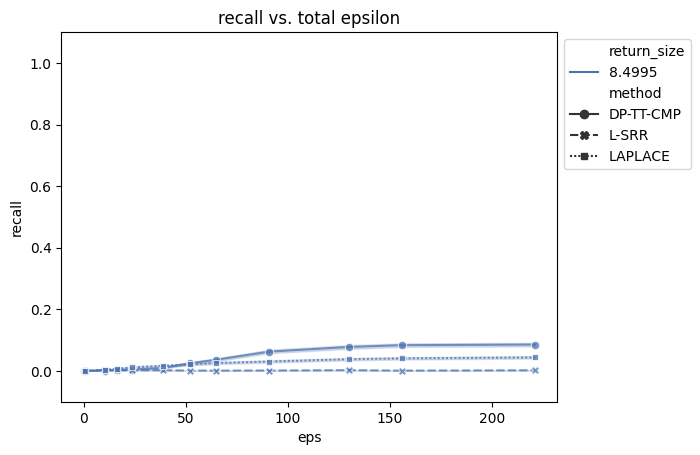

In [57]:
for metric in ['raw_acc', 'top_5_acc', 'precision', 'recall']: # precision and recall considers top K values relevant

    # plot for both DP-TT and LDP
    plot = sns.lineplot(
        data=raw_df, x='eps_cmp', y=f'{metric}', 
        hue='return_size', style='method', markers=True,
        palette='deep', alpha=0.75,
    )

    # graph params
    plot.set(
        ylim=(-0.1, 1.1),
#         xlim=(0, 10),
        title=f'{metric} vs. total epsilon'
    )

    # move legend
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    
    plt.show()

    # save plot
    plot.get_figure().savefig(f'{output_dir}{metric}.png', bbox_inches='tight', dpi=400)
    plot.get_figure().clf()

### DIS Exploration

In [2]:
db_size = 10 ** 6
domain = 10 ** 7

output_dir = f'graphs/densities/size_{db_size}_domain_{domain}/'
raw_df = pd.read_csv(f'{output_dir}raw.csv')

with open(f'{output_dir}metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

In [3]:
raw_df = raw_df[raw_df['method'].isin(['DP-TT-CMP', 'LAPLACE-GEO'])]
# raw_df = raw_df[raw_df['method'].isin(['DP-TT-CMP', 'LAPLACE', 'L-SRR'])]

In [4]:
for early_stopping_level in [1, 3, 5, 9]:
    raw_df.loc[raw_df['early_stopping_level'] == early_stopping_level, 'return_size'] = round(raw_df[raw_df['early_stopping_level'] == early_stopping_level]['return_size'].mean(), 2)

In [5]:
raw_df['geo_eps'] = (raw_df['geo_eps'] / 500).round().astype(int) * 500

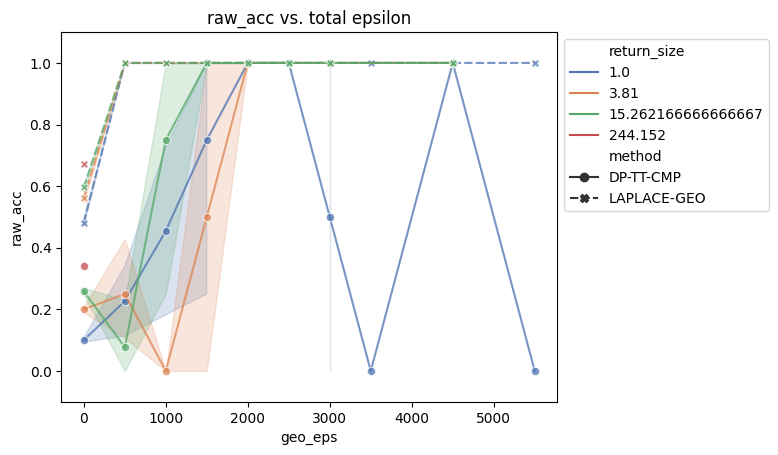

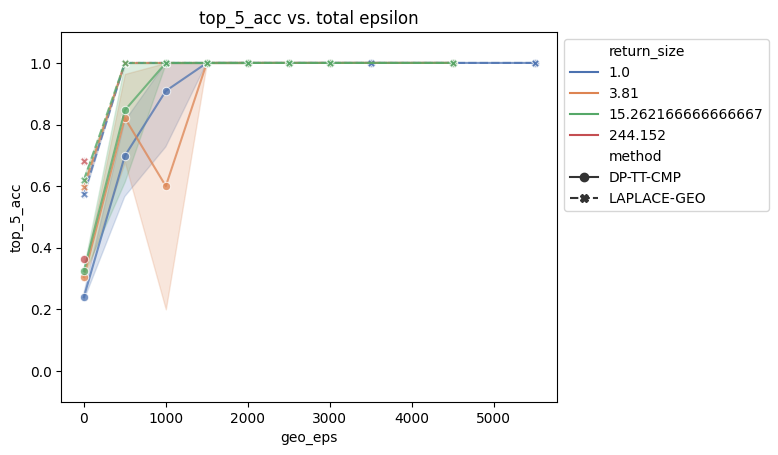

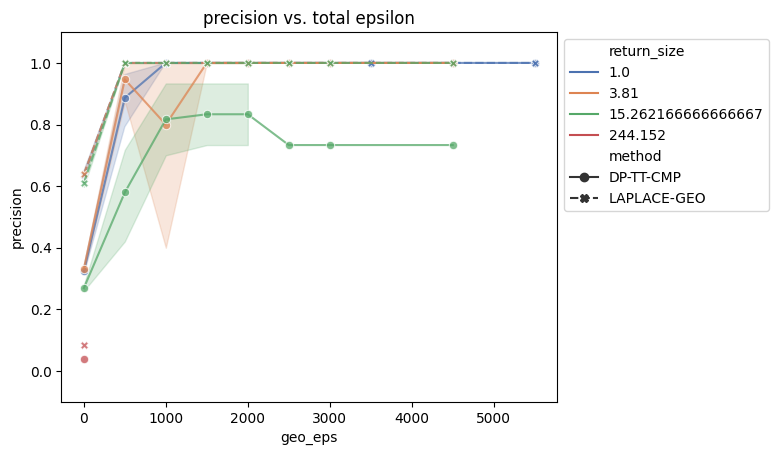

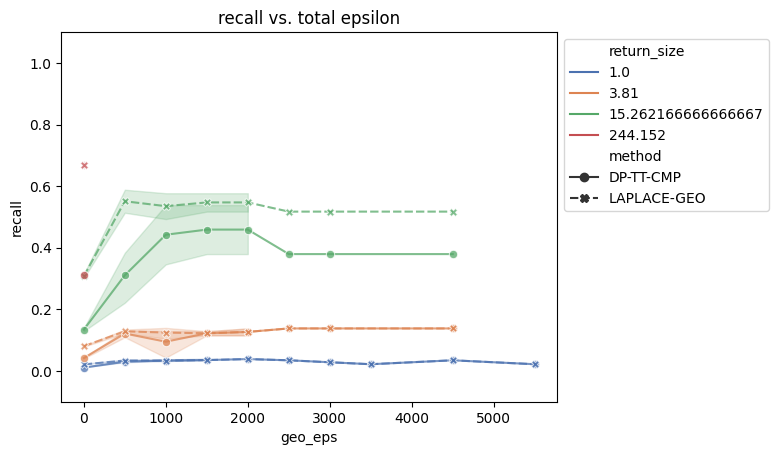

In [6]:
for metric in ['raw_acc', 'top_5_acc', 'precision', 'recall']: # precision and recall considers top K values relevant

    # plot for both DP-TT and LDP
    plot = sns.lineplot(
        data=raw_df, x='geo_eps', y=f'{metric}', 
        hue='return_size', style='method', markers=True,
        palette='deep', alpha=0.75,
    )

    # graph params
    plot.set(
        ylim=(-0.1, 1.1),
#         xlim=(0, 10),
        title=f'{metric} vs. total epsilon'
    )

    # move legend
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    
    plt.show()

    # save plot
    # plot.get_figure().savefig(f'{output_dir}/dis/{metric}_dis.png', bbox_inches='tight', dpi=400)
    plot.get_figure().clf()

### Scheduler Graphs

In [3]:
db_size = 10 ** 5
domain = 10 ** 7

input_dir = f'graphs/schedulers/scheduler_1.6/size_{db_size}_domain_{domain}/'
output_dir = f'graphs/schedulers/inverse/'
raw_df = pd.read_csv(f'{input_dir}raw.csv')

with open(f'{input_dir}metadata.pkl', 'rb') as f:
    metadata = pickle.load(f)

In [4]:
metadata

{'dimension': 2,
 'server_size': 100000,
 'server_domain': 3162.2776601683795,
 'client_batch_size': 500,
 'client_sensitivity': 3162.2776601683795,
 'true_radius': 31,
 'early_stopping_levels': [5],
 'number_of_nn_within_radius': [33,
  29,
  33,
  27,
  36,
  38,
  34,
  35,
  38,
  39,
  25,
  29,
  35,
  28,
  35,
  37,
  37,
  42,
  34,
  23,
  40,
  35,
  30,
  27,
  32,
  31,
  41,
  31,
  28,
  30,
  28,
  28,
  27,
  36,
  27,
  28,
  18,
  34,
  37,
  35,
  31,
  37,
  27,
  18,
  29,
  24,
  34,
  31,
  27,
  41,
  20,
  29,
  48,
  26,
  28,
  26,
  37,
  42,
  28,
  35,
  34,
  31,
  25,
  23,
  27,
  32,
  21,
  26,
  31,
  29,
  36,
  37,
  29,
  31,
  25,
  32,
  28,
  29,
  30,
  28,
  31,
  32,
  38,
  31,
  29,
  26,
  25,
  35,
  28,
  35,
  26,
  34,
  32,
  43,
  28,
  24,
  29,
  28,
  34,
  32,
  35,
  32,
  34,
  51,
  37,
  37,
  32,
  31,
  30,
  35,
  26,
  29,
  30,
  32,
  39,
  31,
  39,
  40,
  29,
  27,
  29,
  35,
  35,
  20,
  31,
  47,
  29,
  34,
  

In [102]:
raw_df = raw_df[raw_df['scheduler_type'].isin(['constant', 'inverse_sqrt', 'inverse_linear', 'inverse_quadratic'])]

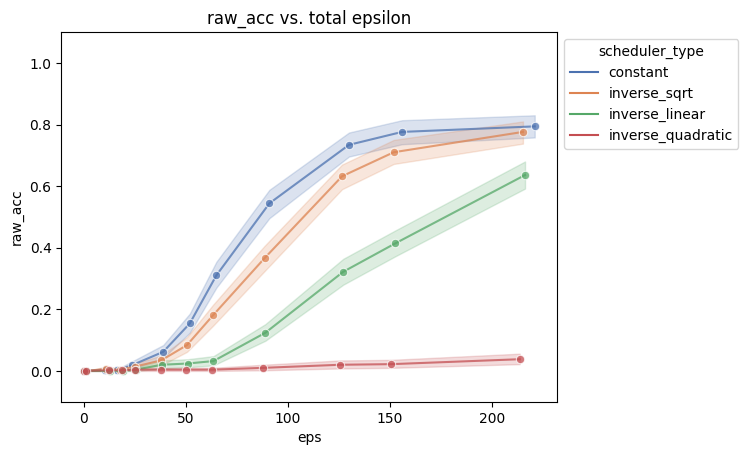

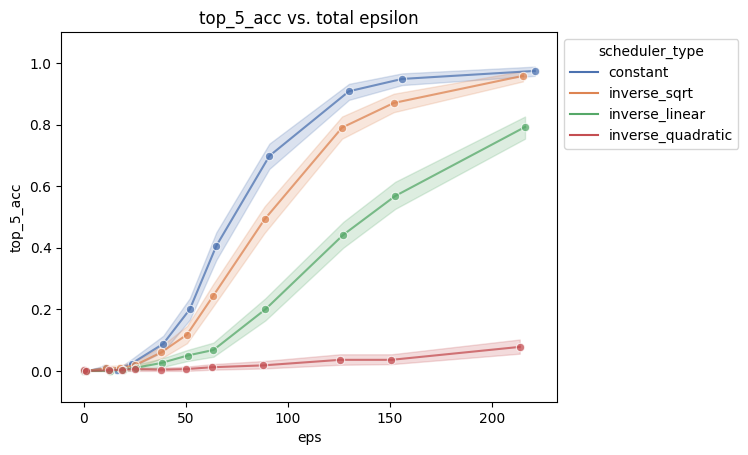

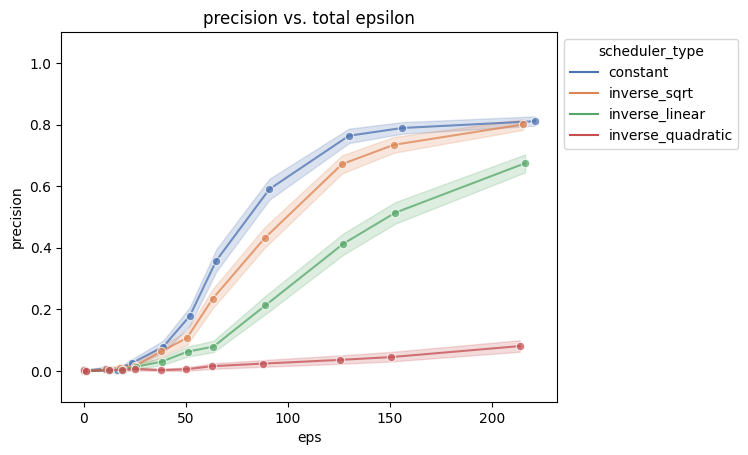

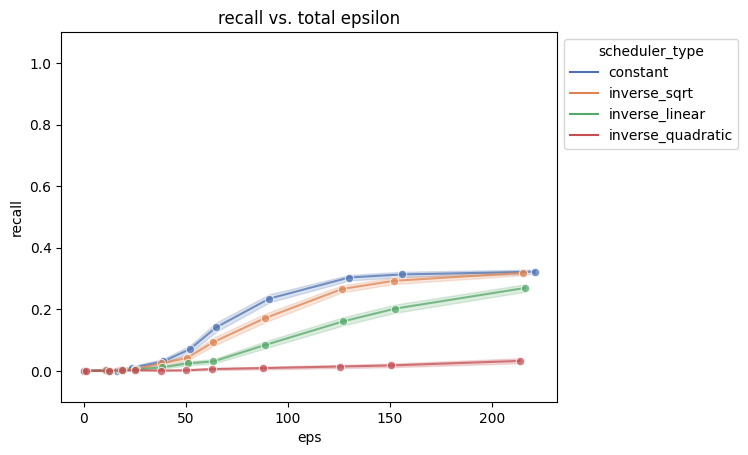

In [103]:
for metric in ['raw_acc', 'top_5_acc', 'precision', 'recall']: # precision and recall considers top K values relevant

    # plot for both DP-TT and LDP
    plot = sns.lineplot(
        data=raw_df, x='eps_cmp', y=f'{metric}', 
        hue='scheduler_type',
        palette='deep', alpha=0.75, marker='o',
    )

    # graph params
    plot.set(
        ylim=(-0.1, 1.1),
        title=f'{metric} vs. total epsilon'
    )

    # move legend
    sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
    
    plt.show()

    # save plot
    plot.get_figure().savefig(f'{output_dir}{metric}.png', bbox_inches='tight', dpi=400)
    plot.get_figure().clf()